## Assignment

In this assignment, we will look at computing the product AB
 of two matrices $A,B∈  \mathbb{R}^{nxn}$
. The following code snippet defines a function that computes the product of two matrices. For example, the product of two 10 by 10 matrices is printed. The final line prints matrix1 @ matrix2 - the @ symbol denotes matrix multiplication, and Python will get Numpy to compute the product of two matrices. By looking at the output, it’s possible to check that the two results are identical.

In [ ]:
import numpy as np


def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]): # c gives the column number for matrix 2
        column = []
        for r in range(mat1.shape[0]): # r gives the row number for matrix 1
            value = 0
            for i in range(mat1.shape[1]): # i gives the column number for matrix 1
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)

print(matrix1.dtype)
print(matrix2.dtype)

float64
float64


## Part 1: Better Function

Write your own function called faster_matrix_product that computes the product of two matrices more efficiently than slow_matrix_product.

In [ ]:
def fast_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    # the condition for matrix multiplication is that the number of matrix 1's
    # column must match the number of matrix 2's row
    assert mat1.shape[1] == mat2.shape[0]

    # The resulting matrix will take on the shape with a number of matrix 1'
    # row and a number of matrix 2's column
    result = np.zeros((mat1.shape[0],mat2.shape[1]))
    for c in range(mat1.shape[1]):
        for r in range(mat2.shape[0]):
            # Multiplying Matrix's 1 row with Matrix's 2 column
            value = np.dot(mat1[c],mat2[:,r])
            result[c,r]=value
    return result


### Checking fast function
 Write a Python script using an assert statement that checks that your function gives the same result as using @ for random 2 by 2, 3 by 3, 4 by 4, and 5 by 5 matrices.

In [ ]:
# the required random square matrix size
matrix_size = [2, 3, 4, 5]


for n in matrix_size:

    # loop through all the required random matrix size to check that the
    # functions gives the same result

    test_mat1 = np.random.rand(n,n)
    test_mat2 = np.random.rand(n,n)

    # Computing the matrix product for the random square matrix

    r_fast_rand_mat = fast_matrix_product(test_mat1, test_mat2)

    # Using assert to check whether both function gives the same result up
    # to 1 d.p precision

    correct_result = test_mat1 @ test_mat2

    # using np.allclose to avoid issue caused by difference in machine precision
    assert np.allclose(correct_result, r_fast_rand_mat)




### Checking Google Colab standard

In [ ]:

!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.154
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
ad

### Comment on function
The fast function is quicker than slow function because it uses vector register (SIMD operation) to perform the row multiply with column action compare to the slow function which multiply the row and column element-wise. Since I am using google colab with Intel Xeon Chip supporting AVX2 standard, the register can take four double precision numbers (our element matrix is in float 64 data tpye) which will speed up the fast function by a factor of 4 (in theory) relative to the slow function.

Furthermore, the slow matrix product has $𝑂(𝑛^3)$  computational complexity (where n is the number of matrix element) due to 3 nested loops, while fast matrix product only have 2 nested loops therefore have computational complexity between $𝑂(𝑛^2)$ and $𝑂(𝑛^3)$. Fast matrix product is also structured so that a transpose operation is not needed.

### Time plot of different-sized matrices for both function
Write a Python script that runs the two functions for matrices of a range of sizes, and use matplotlib to create a plot showing the time taken for different-sized matrices for both functions.




In [ ]:
from timeit import timeit

# creating a list to store the computational time
Time_slow = []
Time_fast = []

# generate a range of size for the matrix starting from 2x2 matrix
Interval = np.linspace(2,1000,10,dtype=int)
count=0



for n in Interval:


    # loop through a range of sizes of square matrix and use timeit to time the computational time

    test_mat1 = np.random.rand(n,n)
    test_mat2 = np.random.rand(n,n)

    # Computing the matrix product for the random square matrix and store the time taken
    t_slow = timeit('slow_matrix_product(test_mat1, test_mat2)',globals=globals(),number=1)
    t_fast = timeit('fast_matrix_product(test_mat1, test_mat2)',globals=globals(),number=1)

    Time_slow.append(t_slow)
    Time_fast.append(t_fast)




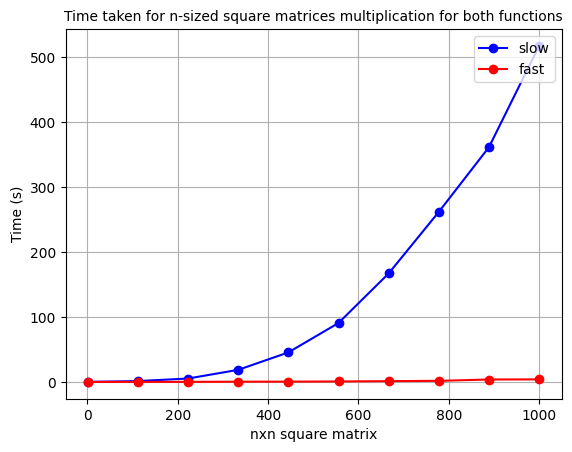

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plotting run time taken for different-sized matrices for both slow and fast functions
fig,ax=plt.subplots()



ax.plot(Interval,Time_slow,color='blue',label='slow',marker='o')
ax.plot(Interval,Time_fast,color='red',label='fast',marker='o')
ax.set_title("Time taken for n-sized square matrices multiplication for both functions",fontsize=10)
ax.set_ylabel("Time (s)")
ax.set_xlabel('nxn square matrix')
ax.legend(loc='upper right')
ax.grid()

# Part 2: Speeding it up with Numba

Create a copy of your function faster_matrix_product that is just-in-time (JIT) compiled using Numba.

In [ ]:
#importing numba and JIT
from numba import jit


@jit# just-in-time compile the function into low level machine code for fast execution
def fast_matrix_product_JIT(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0],mat2.shape[1]))
    for c in range(mat1.shape[1]):
        for r in range(mat2.shape[0]):
            value = np.dot(mat1[c],mat2[:,r])
            result[c,r]=value
    return result


# just-in-time (no python version) compile the function into low level machine code for fast execution

@jit(nopython=True)
def fast_matrix_product_NJIT(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0],mat2.shape[1]))
    for c in range(mat1.shape[1]):
        for r in range(mat2.shape[0]):
            value = np.dot(mat1[c],mat2[:,r])
            result[c,r]=value
    return result

make a plot (similar to that you made in the first part) that shows the times taken to multiply matrices using faster_matrix_product, faster_matrix_product with Numba JIT compilation and Numpy (@).

In [ ]:
Numpy_P2 = []
Time_fast_P2 = []
Time_fast_JIT_P2 = []
Time_fast_NJIT_P2 = []

Interval = [   2 , 112 , 223 , 334 , 445 , 556 , 667,  778 , 889 ,1000]



for n in Interval:


    # loop through all the required random matrix size to check the functions gives the same result

    test_mat1 = np.random.rand(n,n)
    test_mat2 = np.random.rand(n,n)

    # Computing the matrix product for the random square matrix and store the time taken
    t_numpy_P2 = timeit('test_mat1 @ test_mat2', globals=globals(),number=1)
    t_fast_P2 = timeit('fast_matrix_product(test_mat1, test_mat2)',globals=globals(),number=1)
    t_fast_JIT_P2 = timeit('fast_matrix_product_JIT(test_mat1, test_mat2)',globals=globals(),number=1)
    t_fast_NJIT_P2= timeit('fast_matrix_product_NJIT(test_mat1, test_mat2)',globals=globals(),number=1)

    Numpy_P2.append(t_numpy_P2)
    Time_fast_P2.append(t_fast_P2)
    Time_fast_JIT_P2.append(t_fast_JIT_P2)
    Time_fast_NJIT_P2.append(t_fast_NJIT_P2)


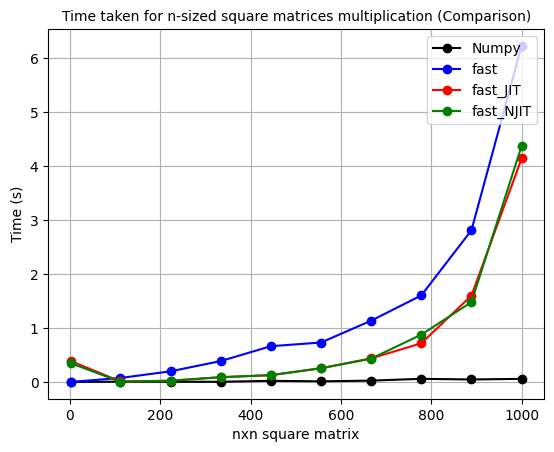

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()


ax.plot(Interval,Numpy_P2,color='black',label='Numpy',marker='o')
ax.plot(Interval,Time_fast_P2,color='blue',label='fast',marker='o')
ax.plot(Interval,Time_fast_JIT_P2,color='red',label='fast_JIT',marker='o')
ax.plot(Interval, Time_fast_NJIT_P2,color='green',label='fast_NJIT',marker='o')
ax.set_title("Time taken for n-sized square matrices multiplication (Comparison)",fontsize=10)
ax.set_ylabel("Time (s)")
ax.set_xlabel('nxn square matrix')
ax.legend(loc='upper right')
ax.grid()

## Comment

Numpy matrix-matrix multiplication is fastest. NJIT and JIT of the fast function perform the same. The unJIT fast function perform the slowest as JIT translate the high level language into machine code for fast execution. For the rest of the assignment, we will use JIT fast function as instructed by the instruction/ assignment scipt.

### Further Speed up via adjusting memory layout
Make a plot that compares the times taken by your JIT compiled function when the inputs have different combinations of C-style and Fortran-style ordering

In [ ]:
# Python use C-style ordering as default so we only change the required matrix in Fortran-style ordering

# As we have already done the time plot for both C-style input we can take the previous result

#This combination is Matrix 1 in C-style and Matrix 2 in Fortran-style
Time_fast_JIT_P2_Mat1_C_Mat2_Fortran = []

#This combination is Matrix 1 in Fortran-style and Matrix 2 in C-style
Time_fast_JIT_P2_Mat1_Fortran_Mat2_C = []

#This combination is both Matrix in Fortran-style
Time_fast_JIT_P2_Mat1_Fortran_Mat2_Fortran = []


Interval = [   2 , 112 , 223 , 334 , 445 , 556 , 667,  778 , 889 ,1000]



for n in Interval:


    # loop through all the required random matrix size to check the functions gives the same result

    mat1_C = np.random.rand(n,n)
    mat2_C = np.random.rand(n,n)
    mat1_Fortran = np.asfortranarray(np.random.rand(n,n))
    mat2_Fortran = np.asfortranarray(np.random.rand(n,n))

    # Computing the matrix product for the random square matrix and store the time taken

    t_fast_JIT_P2_Mat1_C_Mat2_Fortran = timeit('fast_matrix_product_JIT(mat1_C, mat2_Fortran)',globals=globals(),number=1)
    Time_fast_JIT_P2_Mat1_C_Mat2_Fortran.append(t_fast_JIT_P2_Mat1_C_Mat2_Fortran)



    t_fast_JIT_P2_Mat1_Fortran_Mat2_C = timeit('fast_matrix_product_JIT(mat1_Fortran, mat2_C)',globals=globals(),number=1)
    Time_fast_JIT_P2_Mat1_Fortran_Mat2_C.append(t_fast_JIT_P2_Mat1_Fortran_Mat2_C)


    t_fast_JIT_P2_Mat1_Fortran_Mat2_Fortran = timeit('fast_matrix_product_JIT(mat1_Fortran, mat2_Fortran)',globals=globals(),number=1)
    Time_fast_JIT_P2_Mat1_Fortran_Mat2_Fortran.append(t_fast_JIT_P2_Mat1_Fortran_Mat2_Fortran)

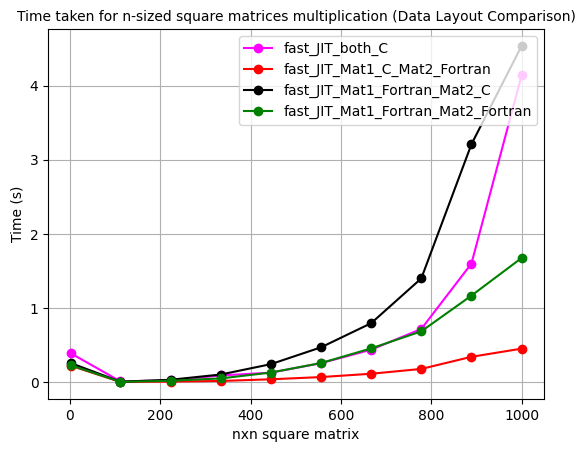

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()


ax.plot(Interval,Time_fast_JIT_P2,color='magenta',label='fast_JIT_both_C',marker='o')
ax.plot(Interval,Time_fast_JIT_P2_Mat1_C_Mat2_Fortran,color='red',label='fast_JIT_Mat1_C_Mat2_Fortran',marker='o')
ax.plot(Interval, Time_fast_JIT_P2_Mat1_Fortran_Mat2_C,color='black',label='fast_JIT_Mat1_Fortran_Mat2_C',marker='o')
ax.plot(Interval, Time_fast_JIT_P2_Mat1_Fortran_Mat2_Fortran,color='green',label='fast_JIT_Mat1_Fortran_Mat2_Fortran',marker='o')


ax.set_title("Time taken for n-sized square matrices multiplication (Data Layout Comparison)",fontsize=10)
ax.set_ylabel("Time (s)")
ax.set_xlabel('nxn square matrix')
ax.legend(loc='upper right')
ax.grid()

log scaled version of the time graph for different combination of C/ Fortran data layout

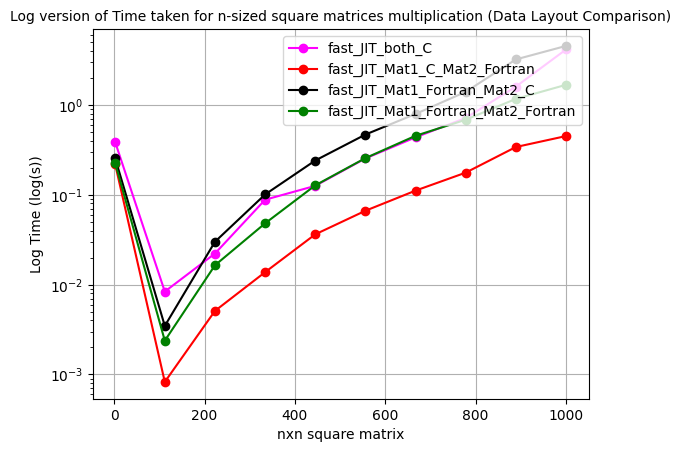

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()


ax.plot(Interval,Time_fast_JIT_P2,color='magenta',label='fast_JIT_both_C',marker='o')
ax.plot(Interval,Time_fast_JIT_P2_Mat1_C_Mat2_Fortran,color='red',label='fast_JIT_Mat1_C_Mat2_Fortran',marker='o')
ax.plot(Interval, Time_fast_JIT_P2_Mat1_Fortran_Mat2_C,color='black',label='fast_JIT_Mat1_Fortran_Mat2_C',marker='o')
ax.plot(Interval, Time_fast_JIT_P2_Mat1_Fortran_Mat2_Fortran,color='green',label='fast_JIT_Mat1_Fortran_Mat2_Fortran',marker='o')

ax.set_yscale('log')


ax.set_title("Log version of Time taken for n-sized square matrices multiplication (Data Layout Comparison)",fontsize=10)
ax.set_ylabel("Log Time (log(s))")
ax.set_xlabel('nxn square matrix')
ax.legend(loc='upper right')
ax.grid()

## Comment on C/ Fortran-style ordering

The input that yields the fastest computation is the combination with Matrix 1 in C-style ordering and Matrix 2 in Fortran-style ordering because of the way the fast function perform the matrix multiplication which takes the row element of matrix 1 and multiply with the column element of matrix 2. Since C-style aligns the matrix row by row in memory and Fortran-style aligns the matrix column by column in memory, the combination mentioned above yields the most efficient data representation by ordering data spatially local in memory for row and column multiplication used in the fast function.

The log graph shows that the gradient of the plots are similar which might be caused by the different data layout.